In [32]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import random

## Part 1

### The differential equation to describe the system:

<img src="equations.png" width=331 height=160 />

\begin{align}
\frac{dx}{dt} &= k_1 - k_2 x + k_3 x^2 y - k_4 x \\
\frac{dy}{dt} &= k_2 x - k_3 x^2 y
\end{align}

## Part 2

### Solving the differential equation for 500 time units

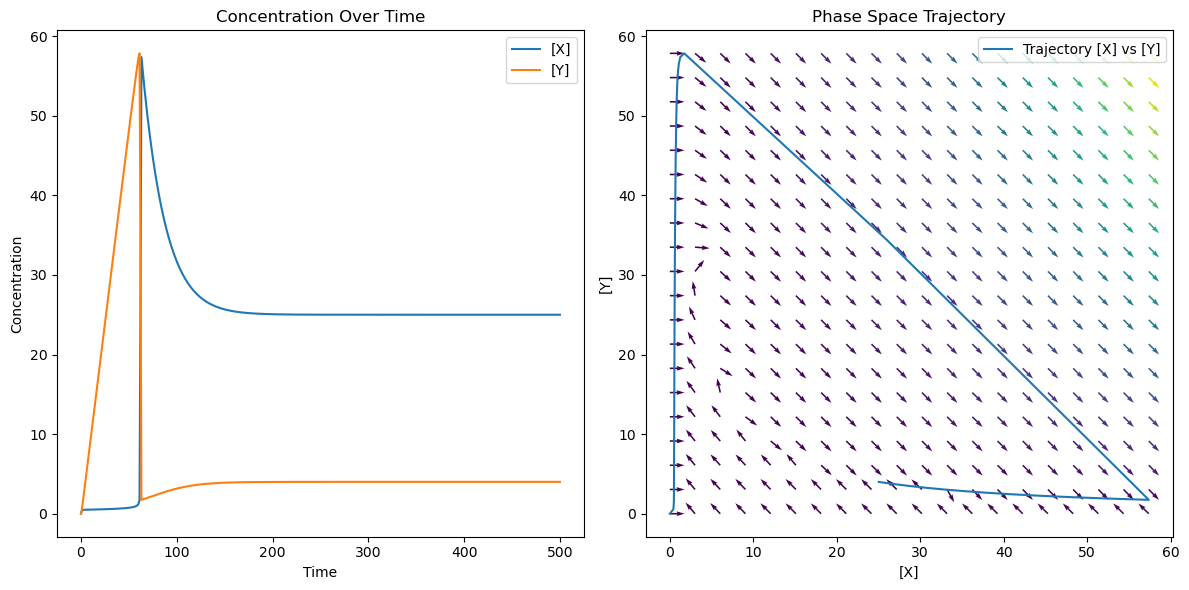

In [3]:
# Constants
k1 = 1.0
k2 = 2.0
k3 = 0.02
k4 = 0.04

# Differential equations
def differential_equations(concentrations, t):
    x, y = concentrations
    dxdt = k1 - k2 * x + k3 * x**2 * y - k4 * x
    dydt = k2 * x - k3 * x**2 * y
    return [dxdt, dydt]

# Initial conditions
x0 = 0.0 
y0 = 0.0
initial_conditions = [x0, y0]

# Time points
t = np.linspace(0, 500, 500)

# Solve ODE
sol = odeint(differential_equations, initial_conditions, t)

# Plotting
plt.figure(figsize=(12, 6))

# [X] and [Y] against time
plt.subplot(1, 2, 1)
plt.plot(t, sol[:, 0], label='[X]')
plt.plot(t, sol[:, 1], label='[Y]')
plt.title('Concentration Over Time')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()

X, Y = np.meshgrid(np.linspace(0, max(sol[:,0]), 20), np.linspace(0, max(sol[:,1]), 20))
U, V = differential_equations([X, Y], 0)  # Compute derivatives
M = np.hypot(U,V)
M[M == 0] = 1.  # avoid division by 0
U /= M
V /= M

# [X] vs [Y]
plt.subplot(1, 2, 2)
plt.quiver(X, Y, U, V, M)
plt.plot(sol[:, 0], sol[:, 1], label='Trajectory [X] vs [Y]')
plt.title('Phase Space Trajectory')
plt.xlabel('[X]')
plt.ylabel('[Y]')
plt.legend()

plt.tight_layout()
plt.show()

Comments:
- X stabilises at 25 and Y at 5, thus X is more stable.
- Concentation of Y is high until X has high concentation causing a drop.
- X concentration is reduces by Y causing an exponential rise in Y.
- Y concentration peaks at 58 when is decreases abruptly while X rises proportionally until reaching 57 where it decreseas until reaching equilibrium.

## Part 3

### Gillespie algorithm

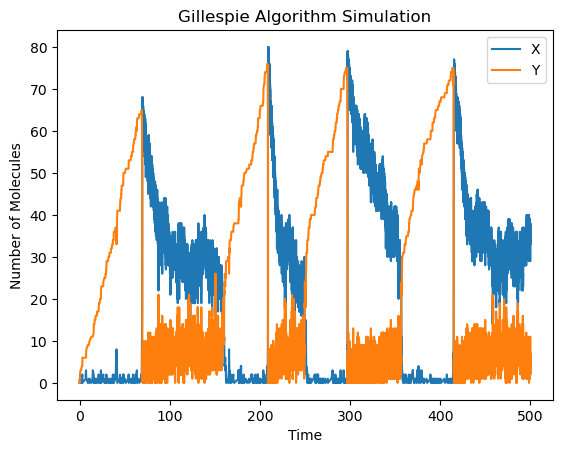

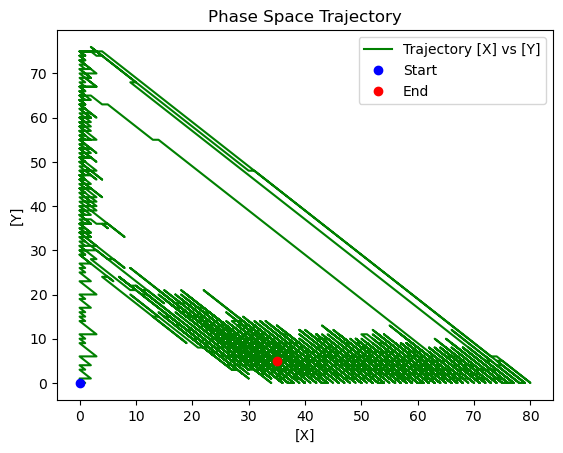

In [47]:

# Reaction rates
k1, k2, k3, k4 = 1, 2, 0.02, 0.04

# Initial numbers of molecules
X, Y = 0, 0

# Record system state at each step
states = [(0, X, Y)]  # (time, X, Y)

T_final = 500
time = 0

def propensities(X, Y):
    return [
        k1,                             # Empty -> X
        k2 * X,                         # X -> Y
        k3 * X * (X - 1) * Y / 2,       # 2X + Y -> 3X
        k4 * X                          # X -> Empty
    ]

while time < T_final:
    a = propensities(X, Y)
    a0 = sum(a)
    if a0 == 0:
        break

    # Time to next reaction
    tau = -np.log(random.random()) / a0
    time += tau

    # Determine which reaction occurs
    r = random.random() * a0
    sum_a = 0
    for idx, ai in enumerate(a):
        sum_a += ai
        if sum_a > r:
            break

    # Update molecule numbers
    if idx == 0:
        X += 1
    elif idx == 1:
        X -= 1
        Y += 1
    elif idx == 2:
        X += 1
        Y -= 1
    elif idx == 3:
        X -= 1

    states.append((time, X, Y))

states_arr = np.array(states)

# Plotting
plt.plot(states_arr[:, 0], states_arr[:, 1], label='X')
plt.plot(states_arr[:, 0], states_arr[:, 2], label='Y')
plt.xlabel('Time')
plt.ylabel('Number of Molecules')
plt.title('Gillespie Algorithm Simulation')
plt.legend()
plt.show()

plt.plot(states_arr[:, 1], states_arr[:, 2], '-g', label='Trajectory [X] vs [Y]')
plt.plot(states_arr[0, 1], states_arr[0, 2], 'bo', label='Start')
plt.plot(states_arr[-1, 1], states_arr[-1, 2], 'ro', label='End')
plt.xlabel('[X]')
plt.ylabel('[Y]')
plt.title('Phase Space Trajectory')
plt.legend()
plt.show()

Comments:
- As depicted, Y concentration increases until interacting with X. Post combination X, as expected, has higher concentration than Y despite some random spikes.
- The trajectory indicates that there is strong parity between X and Y concentrations at low levels below 20.